> *To run this notebook, you will need to clone the repository to get a local copy,  
> and run `jupyter notebook` in that directory to start the server.  
> Then you'll be able to open this notebook document with write-and-execute support.*


# Week 3 - Sensing the Weather

Goals for this lab:

- Play with the foundational libraries of the scientific Python stack
- Analyse weather data from sensors around Australia
- Understand relationships between the weather, available sensors, raw data, and analysis outputs

We've chosen to work specifically with weather data for several reasons.  First, station observations are relatively simple: a one-dimensional timeseries for each variable.  It's relatable and interpretable, because we all live with weather, but it's also related to next week's remote sensing data as both are environmental observations.  Finally, interrogating the choices involved in producing *this* data can reveal just how complex the system of sensing and collecting data can be - and how much it might shape our interpretation.

Importantly, you are *not* expected to know any of this already - or even to follow all the instructions without talking to a peer or asking for help.
The homework this week has focussed on hardware; this session is basically a jump-start on the homework that will prepare you for remote sensing in week 4.  If you want to know more about scientific computing in Python,
start with [Software Carpentary](https://software-carpentry.org/lessons/)
and then check out the [SciPy Lectures](http://scipy-lectures.org/).
All the libraries we're using have official tutorials, user guides, and reference documentation online too.


-----------------------

## Automatic Weather Stations

[Automatic weather stations](https://en.wikipedia.org/wiki/Automatic_weather_station) are basically a bunch of sensors attached to a computer, a power supply, and typically a network connection.  They're a lot cheaper to build and run than the traditional human-staffed variety, so over the last forty years or so Australia has gone from a few hundred to tens of thousands of weather stations - and much of that data is freely available online!

The Bureau of Meteorology publishes rainfall and temperature data at http://www.bom.gov.au/climate/data/  
(and a *lot* of other data in more complicated ways; ask Zac later if you want to find something else)

Let's start by downloading a record of daily rainfall in Canberra:

1. At the link above, search for "canberra" (with the default of daily rainfall observations)
2. How many weather stations are available for Canberra?  Based on the small graph of available data, roughly when were they installed?

We'll use the Queanbean Bowling Club station (number `070072`) for this lab.  Can you tell why?

3. Click the "Get Data" button, then the "All years of data" link in the upper right to download a `.zip` file.
4. Extract the `.csv` file with the data, and the `.txt` file that describes the format.
   Read the note, and discuss it with the person next to you.
5. If you have any questions, check the "More information: for the selected station" link on the station selection page,
   including the "basic site summary" pdf.   Why might this information be useful when working with weather data?
6. A sensebook question: who do you think is the audience for the station metadata pdf?  How might you redesign that or present the information for a different audience?

Now, let's do some amateur meteorology!

In [ ]:
# These are standard imports for almost any data analysis script.
# We use an abbreviation to save on typing in interactive analysis!

# Numpy is the foundational library for the numerical Python ecosystem.
import numpy as np

# Matplotlib adds plotting support to draw graphs and figures (and we only need part of it!)
import matplotlib.pyplot as plt

# Pandas is a high-level library for handling tabular data - if it's possible in Excel, it's
# probably easier in Pandas.  Pandas builds on both Numpy and Matplotlib - and is usually
# simpler, because it's also more specialised.  We'll mostly be using Pandas today.
import pandas as pd

In [1]:
# These are standard imports for almost any data analysis script.
# We use an abbreviation to save on typing in interactive analysis!

# Numpy is the foundational library for the numerical Python ecosystem.
import numpy as np

# Matplotlib adds plotting support to draw graphs and figures (and we only need part of it!)
import matplotlib.pyplot as plt

# Pandas is a high-level library for handling tabular data - if it's possible in Excel, it's
# probably easier in Pandas.  Pandas builds on both Numpy and Matplotlib - and is usually
# simpler, because it's also more specialised.  We'll mostly be using Pandas today.
import pandas as pd

The first step is always to read the data in - Pandas has a `read_csv` function just for this.  
You can find the docs for it [here](https://pandas.pydata.org/pandas-docs/stable/user_guide/io.html#io-read-csv-table), or by executing a cell containing `pd.read_csv?` or `help(pd.read_csv)`.

In [3]:
# "df" is a standard abbreviation for "dataframe".
# It means something like 'I wrote this by muscle memory', or maybe 'I can't be bothered naming this'!
df = pd.read_csv("IDCJAC0009_070072_1800_Data.csv")
# Because the dataframe (i.e. table) is very long, we'll just look at the first few rows.
# Note that this far predates the introduction of automatic weather stations!
df.head()

,Product code,Bureau of Meteorology station number,Year,Month,Day,Rainfall amount (millimetres),Period over which rainfall was measured (days),Quality
0,IDCJAC0009,70072,1870,1,1,NaN,NaN,NaN
1,IDCJAC0009,70072,1870,1,2,NaN,NaN,NaN
2,IDCJAC0009,70072,1870,1,3,NaN,NaN,NaN
3,IDCJAC0009,70072,1870,1,4,NaN,NaN,NaN
4,IDCJAC0009,70072,1870,1,5,NaN,NaN,NaN


There are several ways we could start our analysis.  My personal favorites are:

1. Draw a graph *right now*.  It will be messy, but we'll probably still learn something!
2. Clean up the data a bit first - discard constant columns, rename things for easier typing etc.  (then draw a graph)
3. Clean the data a *lot*, e.g. discard "low quality" data.  (then draw another graph)

Let's do these in order, and see how it looks!

In [4]:
# When column names are valid Python variable names, we can use the 
# "." attribute access syntax to get that "Series" object.  A Series is a column of data.
#
# Run this cell to see the series, then add ".plot()" to get a plot of the values.
df.Year

0        1870
1        1870
2        1870
3        1870
4        1870
5        1870
6        1870
7        1870
8        1870
9        1870
10       1870
11       1870
12       1870
13       1870
14       1870
15       1870
16       1870
17       1870
18       1870
19       1870
20       1870
21       1870
22       1870
23       1870
24       1870
25       1870
26       1870
27       1870
28       1870
29       1870
         ... 
54391    2018
54392    2018
54393    2018
54394    2018
54395    2018
54396    2018
54397    2018
54398    2018
54399    2018
54400    2018
54401    2018
54402    2018
54403    2018
54404    2018
54405    2018
54406    2018
54407    2018
54408    2018
54409    2018
54410    2018
54411    2018
54412    2018
54413    2018
54414    2018
54415    2018
54416    2018
54417    2018
54418    2018
54419    2018
54420    2018
Name: Year, Length: 54421, dtype: int64

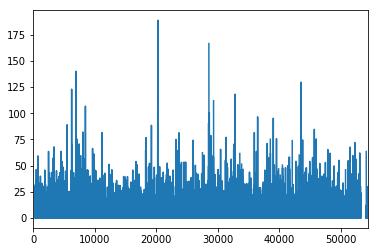

In [5]:
# For names with spaces or punctuation, we have to use Python's bracket
# syntax to get an element of the collection.  df["Year"] would also work,
# but it's usually less convenient - and doesn't support tab-completion!
df["Rainfall amount (millimetres)"].plot()

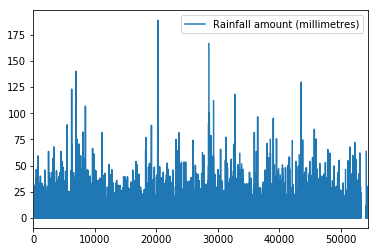

In [6]:
# Or, we can plot the dataframe and tell it what to use for each dimension.
#
# This flexibility is typical of Pandas - because every object has many powerful
# methods attached, you can do (almost) the same thing in many different ways.
# But note: if the *plot* call extracts the series, it adds a label to compensate.
df.plot(y="Rainfall amount (millimetres)")

If or when you want to do more with Pandas plotting, [the official user guide](https://pandas.pydata.org/pandas-docs/stable/user_guide/visualization.html) is quite good.  Sometimes, sadly, you might need to use the lower-level tools provided by [Matplotlib](https://matplotlib.org/).  Other times, you'll be lucky and a high-level API like [Seaborn](https://seaborn.pydata.org/) will do the work for you!  (by convention: `import seaborn as sns`)

----------------

Alright, let's try cleaning up the data a bit more.
We'll remove the colums we don't need, and rename the ones we want to use.

In [7]:
# Remember, `df.drop?` to get help, and tab-completion to see what exists.
# 
# The secret of Pandas is that nobody remembers everything about it, 
# but over time you get a sense of what should be possible - and lots
# of practice searching for methods that probably exist!
#
# This sets df to a new dataframe, so running the cell a second time will fail.
# Because these columns don't exist in the new df, it's an error to try to drop them.
# Go re-run the cell with read_csv, then try again.
df = df.drop(columns=[
    "Product code",
    "Bureau of Meteorology station number",
]).rename(columns={
    "Rainfall amount (millimetres)": "rainfall_mm",
    "Period over which rainfall was measured (days)": "measurement_period_days",
    "Quality": "quality",
})
# Then we check the first few rows again, to make sure we know what that did!
df.head()

,Year,Month,Day,rainfall_mm,measurement_period_days,quality
0,1870,1,1,NaN,NaN,NaN
1,1870,1,2,NaN,NaN,NaN
2,1870,1,3,NaN,NaN,NaN
3,1870,1,4,NaN,NaN,NaN
4,1870,1,5,NaN,NaN,NaN


That's a lot more compact!

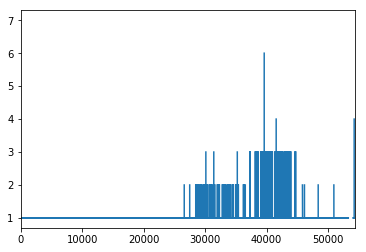

In [8]:
# Let's look at the period_measured, for a change.
# Look back at the notes
df.measurement_period_days.plot()

That's still the same data as before cleaning - we just massaged it into a more convenient shape to code against.

Now, let's make a new table that will have the date as the index, and remove low-quality observations including those taken over multiple days.  After that, it should be simple to do some statistics!

In [9]:
# Now that we know what's in the file, we can take advantage of that when reading it in!
# `parse_dates` creates a unified date column, using a date (not integer) datatype,
# and `index_col` sets the date (not the row number) as the index - it's a timeseries. 
clean = pd.read_csv(
    "IDCJAC0009_070072_1800_Data.csv",
    parse_dates={"date": ["Year", "Month", "Day"]},
    index_col="date",
# Then repeat our initial cleaning steps as soon as the file is opened...
).drop(columns=[
    "Product code",
    "Bureau of Meteorology station number",
]).rename(columns={
    "Rainfall amount (millimetres)": "rainfall_mm",
    "Period over which rainfall was measured (days)": "measurement_period_days",
    "Quality": "quality",
})

# And finally, show the first few rows again
clean.head()

,rainfall_mm,measurement_period_days,quality
date,,,
1870-01-01,NaN,NaN,NaN
1870-01-02,NaN,NaN,NaN
1870-01-03,NaN,NaN,NaN
1870-01-04,NaN,NaN,NaN
1870-01-05,NaN,NaN,NaN


In [10]:
# We'll create a variable "rain", which is a subset of the rainfall observations
rain = clean.rainfall_mm.where(
    # If clean.quality is not Y, set the rainfall value to NaN
    # (as if there was no observation at all)
    clean.quality == "Y"
).where(
    # If the period over which the rainfall was measured is longer than a day,
    # discard those measurements too.  Other ways to handle this include dividing
    # the rainfall by the days of observation, and optionally backfilling previous 
    # days.  But that may change the distribution, because rain doesn't fall evenly!
    # (of course, length of observation may be correlated with rainfall...)
    clean.measurement_period_days.fillna(1) == 1
)
# Anyway, `rain` is a time-indexed Series object, showing rainfall.
rain.head()

date
1870-01-01   NaN
1870-01-02   NaN
1870-01-03   NaN
1870-01-04   NaN
1870-01-05   NaN
Name: rainfall_mm, dtype: float64

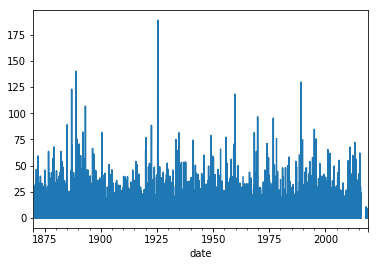

In [11]:
# Of course, we can still plot this...
rain.plot()

With a nice clean dataset in hand, I suggest reading through the [10 minutes to Pandas](https://pandas.pydata.org/pandas-docs/stable/getting_started/10min.html) guide to get a sense of what is possible.  For more detail, [the pandas docs](https://pandas.pydata.org/pandas-docs/stable/index.html) are actually really good - though I'd suggest looking at the user guides over the API reference pages.

I'll just put a few demos here, because you don't actually need to know the detail of this for this course - the goal of today's lab is to get you comfortable doing data analysis in Python.  So long as you have that confidence and some idea of what is possible, you can look up any details if or when you actually need them later.

How would you validate or 'sanity-check' these results?  Is the median rainfall reasonable?  The multi-year trend?  What would you need to know to find out?

In [23]:
# we can calculate statistics such as mean, median, and mode:
rain.mean()

1.539927243174229

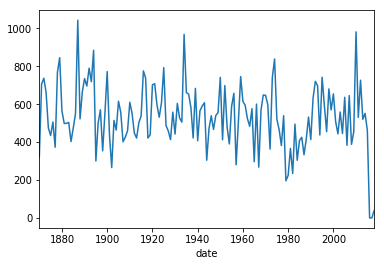

In [13]:
# And we can do some fancier stuff too: how much did it rain each year?
rain.groupby(rain.index.year).sum().plot()

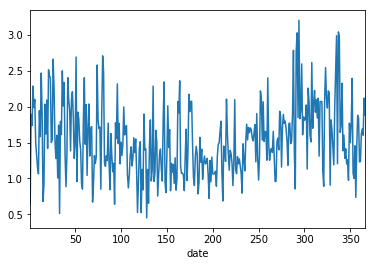

In [27]:
# And when during the year does rain usually fall?
rain.groupby(rain.index.dayofyear).mean().plot()

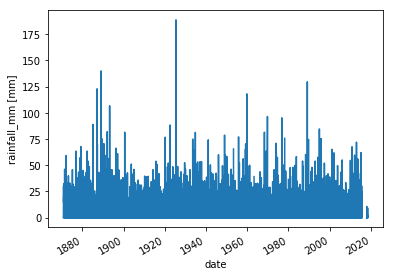

In [20]:
# Finally, a preview of Xarray - a tool designed for multidimensional scientific data.
# We'll be using this for remote sensing, as Pandas is designed for any kind of tabular data.
r = rain.to_xarray()
r.attrs["units"] = "mm"  # automatic axis labels!
r.plot()

That brings us to the end of the worked examples with Pandas.  

You might have noticed that we didn't use Numpy or Matplotlib anywhere in this notebook - or at least not directly.
However, Pandas uses matplotlib to draw every plot we've seen, and both Pandas and Matplotlib use Numpy to handle numerical data of all kinds.  More practically, it's a good habit to have all your imports in the first cell - and can be tedious to go back and add one when you're in the middle of an exploration!


## What next?

A worked example is nice, but there's no substitute for practice.  Your challenge is to investigate the relationship between daily rainfall.

- In what season does rain usually fall in Canberra?  Darwin?  Perth?

Or anything else you'd like to discover!  

This is a chance to play and explore with the code **and** to think and learn about how the details of the sensors affect the data they collect.  

In [28]:
# DATA For Perth
# Station Id: 009021 (Perth Airport)
# http://www.bom.gov.au/jsp/ncc/cdio/weatherData/av?p_nccObsCode=136&p_display_type=dailyDataFile&p_startYear=&p_c=&p_stn_num=009021 
# Data is recorded from 1944 until 2019 (present day)
# Now that we know what's in the file, we can take advantage of that when reading it in!
# `parse_dates` creates a unified date column, using a date (not integer) datatype,
# and `index_col` sets the date (not the row number) as the index - it's a timeseries. 
clean_wa = pd.read_csv(
    "IDCJAC0009_009021_1800_Data.csv",
    parse_dates={"date": ["Year", "Month", "Day"]},
    index_col="date",
# Then repeat our initial cleaning steps as soon as the file is opened...
).drop(columns=[
    "Product code",
    "Bureau of Meteorology station number",
]).rename(columns={
    "Rainfall amount (millimetres)": "rainfall_mm",
    "Period over which rainfall was measured (days)": "measurement_period_days",
    "Quality": "quality",
})

# And finally, show the first few rows again
clean_wa.head()
# We'll create a variable "rain", which is a subset of the rainfall observations
rain_wa = clean_wa.rainfall_mm.where(
    # If clean.quality is not Y, set the rainfall value to NaN
    # (as if there was no observation at all)
    clean_wa.quality == "Y"
).where(
    # If the period over which the rainfall was measured is longer than a day,
    # discard those measurements too.  Other ways to handle this include dividing
    # the rainfall by the days of observation, and optionally backfilling previous 
    # days.  But that may change the distribution, because rain doesn't fall evenly!
    # (of course, length of observation may be correlated with rainfall...)
    clean_wa.measurement_period_days.fillna(1) == 1
)
# Anyway, `rain` is a time-indexed Series object, showing rainfall.
rain_wa.head()

date
1944-01-01   NaN
1944-01-02   NaN
1944-01-03   NaN
1944-01-04   NaN
1944-01-05   NaN
Name: rainfall_mm, dtype: float64

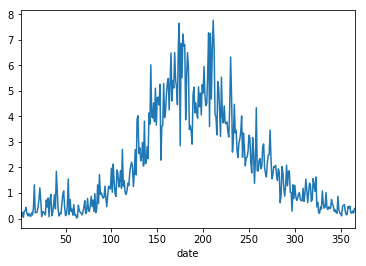

In [30]:
rain_wa.groupby(rain_wa.index.dayofyear).mean().plot()

In [31]:
# DATA For Darwin
# Station Id: 014015 (Darwin Airport)
# http://www.bom.gov.au/jsp/ncc/cdio/weatherData/av?p_nccObsCode=136&p_display_type=dailyDataFile&p_startYear=&p_c=&p_stn_num=014015
# Data is recorded from 1941 until 2019 (present day)
# Now that we know what's in the file, we can take advantage of that when reading it in!
# `parse_dates` creates a unified date column, using a date (not integer) datatype,
# and `index_col` sets the date (not the row number) as the index - it's a timeseries. 
clean_nt = pd.read_csv(
    "IDCJAC0009_014015_1800_Data.csv",
    parse_dates={"date": ["Year", "Month", "Day"]},
    index_col="date",
# Then repeat our initial cleaning steps as soon as the file is opened...
).drop(columns=[
    "Product code",
    "Bureau of Meteorology station number",
]).rename(columns={
    "Rainfall amount (millimetres)": "rainfall_mm",
    "Period over which rainfall was measured (days)": "measurement_period_days",
    "Quality": "quality",
})

# And finally, show the first few rows again
clean_nt.head()
# We'll create a variable "rain", which is a subset of the rainfall observations
rain_nt = clean_nt.rainfall_mm.where(
    # If clean.quality is not Y, set the rainfall value to NaN
    # (as if there was no observation at all)
    clean_nt.quality == "Y"
).where(
    # If the period over which the rainfall was measured is longer than a day,
    # discard those measurements too.  Other ways to handle this include dividing
    # the rainfall by the days of observation, and optionally backfilling previous 
    # days.  But that may change the distribution, because rain doesn't fall evenly!
    # (of course, length of observation may be correlated with rainfall...)
    clean_nt.measurement_period_days.fillna(1) == 1
)
# Anyway, `rain` is a time-indexed Series object, showing rainfall.
rain_nt.head()

date
1941-01-01     2.8
1941-01-02    37.3
1941-01-03    38.9
1941-01-04    14.0
1941-01-05     3.0
Name: rainfall_mm, dtype: float64

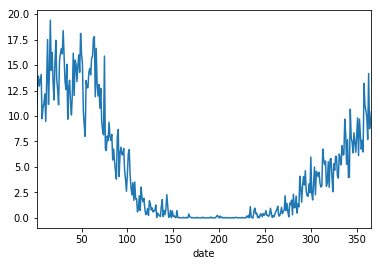

In [33]:
rain_nt.groupby(rain_nt.index.dayofyear).mean().plot()

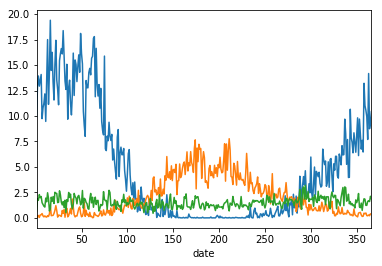

In [34]:
rain_nt.groupby(rain_nt.index.dayofyear).mean().plot()
rain_wa.groupby(rain_wa.index.dayofyear).mean().plot()
rain.groupby(rain.index.dayofyear).mean().plot()